In [1]:
import warnings
warnings.simplefilter(action ="ignore")

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Import the necessary packages
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

In [2]:
# Load Dataset
df = pd.read_csv('D:/fetal_health.csv')

In [3]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'class_label_column' is the name of the column containing class labels
class_labels_counts = df['fetal_health'].value_counts()

# Print the results
for label, count in class_labels_counts.items():
    print(f"Class {label}: {count} instances")


Class 1.0: 1655 instances
Class 2.0: 295 instances
Class 3.0: 176 instances


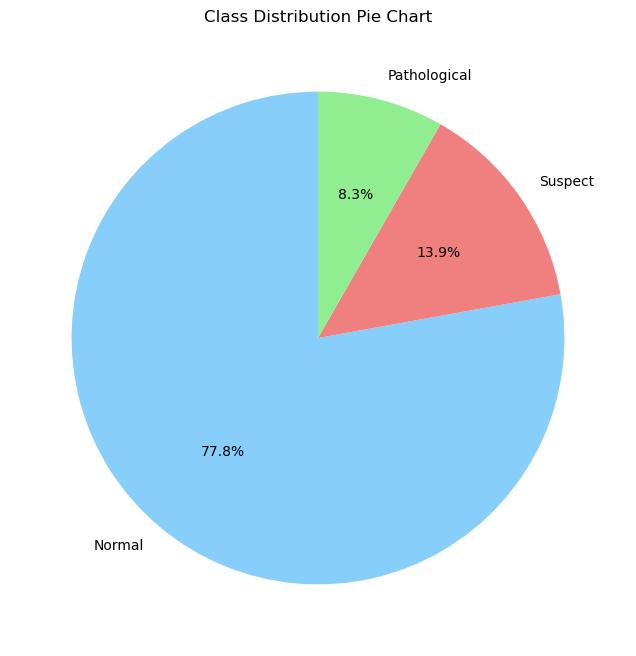

In [4]:
import matplotlib.pyplot as plt

# Assuming 'class_labels_counts' contains the counts of each class label as obtained from the previous code
class_labels_counts = df['fetal_health'].value_counts()

# Define labels and sizes for the pie chart
labels = ['Normal', 'Suspect', 'Pathological']
sizes = class_labels_counts.values

# Define colors for each class label
colors = ['lightskyblue', 'lightcoral', 'lightgreen']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Class Distribution Pie Chart')
plt.show()


In [5]:
X = df.drop("fetal_health", axis=1)  # Adjust "target_variable_column" with your actual column name
y = df["fetal_health"]

In [6]:
# Given class distribution
class_distribution = {
    'Class 1.0': 1655,
    'Class 2.0': 295,
    'Class 3.0': 176
}

# Imbalance ratio calculation
imbalance_ratios = {
    label: class_distribution['Class 1.0'] / count
    for label, count in class_distribution.items()
}

# Display imbalance ratios
for label, ratio in imbalance_ratios.items():
    print(f'Imbalance Ratio for {label}: {ratio}')


Imbalance Ratio for Class 1.0: 1.0
Imbalance Ratio for Class 2.0: 5.610169491525424
Imbalance Ratio for Class 3.0: 9.403409090909092


In [7]:
from sklearn.utils import resample
from collections import Counter

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display class distribution before undersampling
print("Class distribution before undersampling:", Counter(y_train))

# Determine the minimum number of instances in any class
min_class_samples = min(Counter(y_train).values())

# Undersample all classes to the minimum number of instances
X_resampled, y_resampled = [], []
for label in set(y_train):
    X_label = X_train[y_train == label]
    X_resampled_label, y_resampled_label = resample(X_label, y_train[y_train == label],
                                                   replace=False, n_samples=min_class_samples,
                                                   random_state=42)
    X_resampled.append(X_resampled_label)
    y_resampled.extend(y_resampled_label)

# Combine the undersampled data
X_resampled = np.vstack(X_resampled)
y_resampled = np.array(y_resampled)

# Display class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_resampled))


Class distribution before undersampling: Counter({1.0: 1322, 2.0: 231, 3.0: 147})
Class distribution after undersampling: Counter({1.0: 147, 2.0: 147, 3.0: 147})


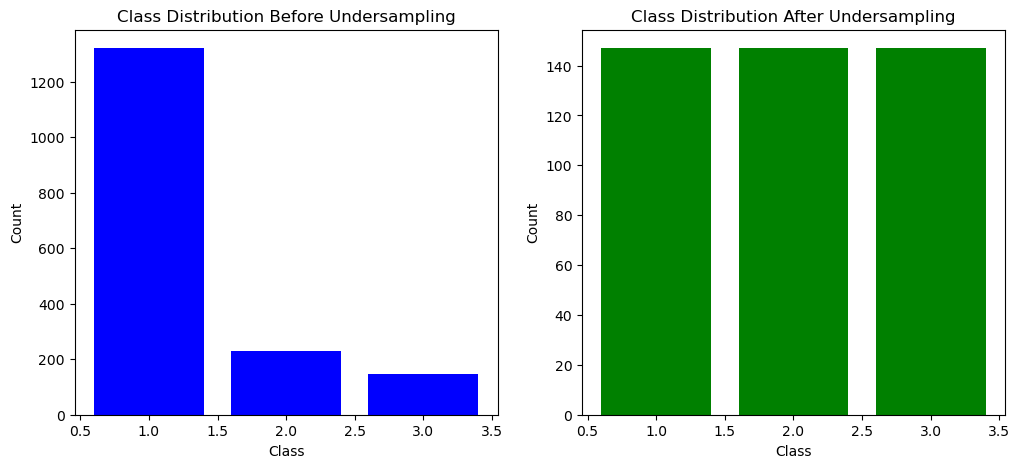

In [8]:
import matplotlib.pyplot as plt
from collections import Counter

# Class distribution before undersampling
class_distribution_before = Counter(y_train)

# Class distribution after undersampling
class_distribution_after = Counter(y_resampled)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot before undersampling
ax1.bar(class_distribution_before.keys(), class_distribution_before.values(), color='blue')
ax1.set_title('Class Distribution Before Undersampling')
ax1.set_xlabel('Class')
ax1.set_ylabel('Count')

# Plot after undersampling
ax2.bar(class_distribution_after.keys(), class_distribution_after.values(), color='green')
ax2.set_title('Class Distribution After Undersampling')
ax2.set_xlabel('Class')
ax2.set_ylabel('Count')

plt.show()


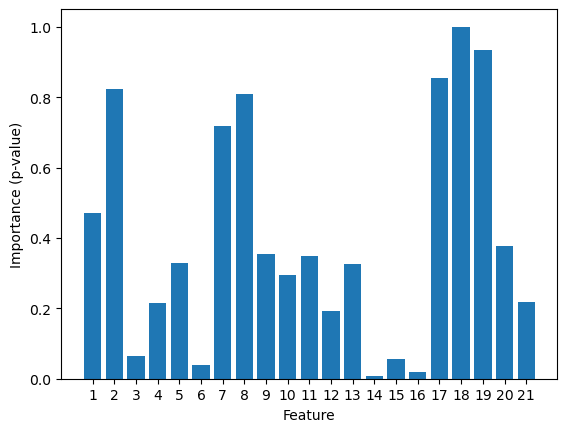

In [9]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt


k_best = 10
selector = SelectKBest(f_classif, k=k_best)
X_resampled_selected = selector.fit_transform(X_resampled, y_resampled)

# Plotting feature importances
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(range(X_resampled.shape[1]), scores, align="center")
plt.xticks(range(X_resampled.shape[1]), range(1, X_resampled.shape[1] + 1))
plt.xlabel("Feature")
plt.ylabel("Importance (p-value)")
plt.show()


In [10]:
# Get the indices of the selected features
selected_feature_indices = selector.get_support()

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Display the selected feature names
print("Selected feature names:", selected_feature_names)


Selected feature names: Index(['baseline value', 'accelerations', 'prolongued_decelerations',
       'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'mean_value_of_long_term_variability', 'histogram_mode',
       'histogram_mean', 'histogram_median', 'histogram_variance'],
      dtype='object')


# RF

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_resampled_selected is your feature matrix with selected features and y_resampled is the corresponding target variable

# Split the data into training and testing sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_selected, y_train_selected)

# Make predictions on the test set
y_pred_selected = rf_classifier.predict(X_test_selected)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test_selected, y_pred_selected)
print("Accuracy:", accuracy)

# Display the classification report
print("Classification Report:\n", classification_report(y_test_selected, y_pred_selected))


Accuracy: 0.8764044943820225
Classification Report:
               precision    recall  f1-score   support

         1.0       0.92      0.92      0.92        36
         2.0       0.81      0.78      0.79        27
         3.0       0.89      0.92      0.91        26

    accuracy                           0.88        89
   macro avg       0.87      0.87      0.87        89
weighted avg       0.88      0.88      0.88        89



# Lr

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X_resampled_selected is your feature matrix with selected features and y_resampled is the corresponding target variable

# Split the data into training and testing sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Create a Linear Regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train_selected, y_train_selected)

# Make predictions on the test set
y_pred_selected = linear_reg_model.predict(X_test_selected)

# Evaluate the performance of the model
mse = mean_squared_error(y_test_selected, y_pred_selected)
r2 = r2_score(y_test_selected, y_pred_selected)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Optionally, you can also display the coefficients and intercept
print("Coefficients:", linear_reg_model.coef_)
print("Intercept:", linear_reg_model.intercept_)


Mean Squared Error: 0.20348889907723952
R-squared: 0.7025035862696909
Coefficients: [ 1.51670680e-02 -6.41899331e+01  2.14855354e+02  2.00860719e-02
 -2.17778433e-02 -3.65927242e-03 -5.08833651e-03 -2.06001426e-03
 -6.16245631e-03  2.07918966e-03]
Intercept: 0.6200396172518763


# logis reg

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Assuming X_resampled_selected is your feature matrix with selected features and y_resampled is the corresponding target variable

# Split the data into training and testing sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Create a Logistic Regression model
logistic_reg_model = LogisticRegression()

# Train the model
logistic_reg_model.fit(X_train_selected, y_train_selected)

# Make predictions on the test set
y_pred_selected = logistic_reg_model.predict(X_test_selected)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test_selected, y_pred_selected)
conf_matrix = confusion_matrix(y_test_selected, y_pred_selected)
classification_rep = classification_report(y_test_selected, y_pred_selected)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Optionally, you can also display the coefficients and intercept
print("Coefficients:", logistic_reg_model.coef_)
print("Intercept:", logistic_reg_model.intercept_)


Accuracy: 0.6966292134831461
Confusion Matrix:
 [[22 14  0]
 [ 5 19  3]
 [ 1  4 21]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.79      0.61      0.69        36
         2.0       0.51      0.70      0.59        27
         3.0       0.88      0.81      0.84        26

    accuracy                           0.70        89
   macro avg       0.72      0.71      0.71        89
weighted avg       0.73      0.70      0.70        89

Coefficients: [[-8.29041717e-02  1.28663414e-03 -9.54862812e-05 -8.28205131e-02
   2.05291628e-01 -3.02090928e-02  9.33770849e-03 -9.58485193e-02
   2.01270124e-01 -5.68613281e-03]
 [-1.48292359e-01 -1.13217345e-03  9.70818205e-06  8.39038517e-03
  -1.10098028e-01  6.11429121e-02 -3.66404925e-02  1.72211125e-01
   1.13336028e-02 -3.05482634e-03]
 [ 2.31196531e-01 -1.54460686e-04  8.57780991e-05  7.44301280e-02
  -9.51935995e-02 -3.09338193e-02  2.73027840e-02 -7.63626058e-02
  -2.12603727e-01  8.74095915e

# Knn

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_resampled_selected is your feature matrix with selected features and y_resampled is the corresponding target variable

# Split the data into training and testing sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Create a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed

# Train the model
knn_model.fit(X_train_selected, y_train_selected)

# Make predictions on the test set
y_pred_selected = knn_model.predict(X_test_selected)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test_selected, y_pred_selected)
conf_matrix = confusion_matrix(y_test_selected, y_pred_selected)
classification_rep = classification_report(y_test_selected, y_pred_selected)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8314606741573034
Confusion Matrix:
 [[28  6  2]
 [ 2 22  3]
 [ 0  2 24]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.93      0.78      0.85        36
         2.0       0.73      0.81      0.77        27
         3.0       0.83      0.92      0.87        26

    accuracy                           0.83        89
   macro avg       0.83      0.84      0.83        89
weighted avg       0.84      0.83      0.83        89



# Svm

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_resampled_selected is your feature matrix with selected features and y_resampled is the corresponding target variable

# Split the data into training and testing sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Create an SVM model
svm_model = SVC(kernel='linear')  # You can choose different kernels, such as 'linear', 'rbf', etc.

# Train the model
svm_model.fit(X_train_selected, y_train_selected)

# Make predictions on the test set
y_pred_selected = svm_model.predict(X_test_selected)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test_selected, y_pred_selected)
conf_matrix = confusion_matrix(y_test_selected, y_pred_selected)
classification_rep = classification_report(y_test_selected, y_pred_selected)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.7640449438202247
Confusion Matrix:
 [[27  8  1]
 [ 5 19  3]
 [ 1  3 22]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.82      0.75      0.78        36
         2.0       0.63      0.70      0.67        27
         3.0       0.85      0.85      0.85        26

    accuracy                           0.76        89
   macro avg       0.77      0.77      0.77        89
weighted avg       0.77      0.76      0.77        89



# DT

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_resampled_selected is your feature matrix with selected features and y_resampled is the corresponding target variable

# Split the data into training and testing sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Create a Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train_selected, y_train_selected)

# Make predictions on the test set
y_pred_selected = dt_model.predict(X_test_selected)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test_selected, y_pred_selected)
conf_matrix = confusion_matrix(y_test_selected, y_pred_selected)
classification_rep = classification_report(y_test_selected, y_pred_selected)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8539325842696629
Confusion Matrix:
 [[34  2  0]
 [ 4 18  5]
 [ 1  1 24]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.87      0.94      0.91        36
         2.0       0.86      0.67      0.75        27
         3.0       0.83      0.92      0.87        26

    accuracy                           0.85        89
   macro avg       0.85      0.84      0.84        89
weighted avg       0.85      0.85      0.85        89



# Ann

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming X_resampled_selected is your feature matrix with selected features and y_resampled is the corresponding target variable

# Split the data into training and testing sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Standardize the feature values
scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train_selected)
X_test_selected = scaler.transform(X_test_selected)

# Create an MLP classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the model
mlp_model.fit(X_train_selected, y_train_selected)

# Make predictions on the test set
y_pred_selected = mlp_model.predict(X_test_selected)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test_selected, y_pred_selected)
conf_matrix = confusion_matrix(y_test_selected, y_pred_selected)
classification_rep = classification_report(y_test_selected, y_pred_selected)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.797752808988764
Confusion Matrix:
 [[30  6  0]
 [ 3 20  4]
 [ 2  3 21]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.86      0.83      0.85        36
         2.0       0.69      0.74      0.71        27
         3.0       0.84      0.81      0.82        26

    accuracy                           0.80        89
   macro avg       0.80      0.79      0.79        89
weighted avg       0.80      0.80      0.80        89



# LSTM

In [18]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_resampled_selected is your resampled and selected feature matrix
# and y_resampled is the corresponding target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred = (model.predict(X_test_reshaped) > 0.5).astype(int)

# Print accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))





Epoch 1/10


10/10 [==============================] - 6s 104ms/step - loss: 0.5686 - accuracy: 0.2057 - val_loss: 0.4735 - val_accuracy: 0.2222
Epoch 2/10
10/10 [==============================] - 0s 18ms/step - loss: 0.4231 - accuracy: 0.2373 - val_loss: 0.2995 - val_accuracy: 0.2500
Epoch 3/10
10/10 [==============================] - 0s 13ms/step - loss: 0.2552 - accuracy: 0.2722 - val_loss: 0.1021 - val_accuracy: 0.2778
Epoch 4/10
10/10 [==============================] - 0s 12ms/step - loss: 0.0617 - accuracy: 0.2880 - val_loss: -0.1389 - val_accuracy: 0.3056
Epoch 5/10
10/10 [==============================] - 0s 10ms/step - loss: -0.1784 - accuracy: 0.3101 - val_loss: -0.4228 - val_accuracy: 0.3056
Epoch 6/10
10/10 [==============================] - 0s 9ms/step - loss: -0.4606 - accuracy: 0.3165 - val_loss: -0.7618 - val_accuracy: 0.3056
Epoch 7/10
10/10 [==============================] - 0s 10ms/step - loss: -0.8073 - accuracy: 0.3165 - val_loss: -1.1620 - val_accuracy: 0.3056
E

# MLP

In [19]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X_resampled_selected is your resampled and selected feature matrix
# and y_resampled is the corresponding target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the MLP model
model = Sequential([
    Dense(50, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

# Print accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Epoch 1/10
10/10 [==============================] - 2s 49ms/step - loss: 0.6114 - accuracy: 0.1266 - val_loss: 0.3955 - val_accuracy: 0.1944
Epoch 2/10
10/10 [==============================] - 0s 9ms/step - loss: 0.0986 - accuracy: 0.1772 - val_loss: -0.0846 - val_accuracy: 0.1944
Epoch 3/10
10/10 [==============================] - 0s 12ms/step - loss: -0.3724 - accuracy: 0.2120 - val_loss: -0.5645 - val_accuracy: 0.1944
Epoch 4/10
10/10 [==============================] - 0s 15ms/step - loss: -0.8315 - accuracy: 0.2405 - val_loss: -1.0365 - val_accuracy: 0.2222
Epoch 5/10
10/10 [==============================] - 0s 10ms/step - loss: -1.2732 - accuracy: 0.2753 - val_loss: -1.5166 - val_accuracy: 0.2778
Epoch 6/10
10/10 [==============================] - 0s 13ms/step - loss: -1.7401 - accuracy: 0.3006 - val_loss: -1.9897 - val_accuracy: 0.3056
Epoch 7/10
10/10 [==============================] - 0s 13ms/step - loss: -2.2036 - accuracy: 0.3133 - val_loss: -2.4819 - val_accuracy: 0.3056
Epo

# cnn

In [20]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Assuming X_resampled_selected is your resampled and selected feature matrix
# and y_resampled is the corresponding target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for CNN input (samples, time steps, features)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred = (model.predict(X_test_reshaped) > 0.5).astype(int)

# Print accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Epoch 1/10
10/10 [==============================] - 3s 63ms/step - loss: -0.6881 - accuracy: 0.3165 - val_loss: -2.1642 - val_accuracy: 0.3056
Epoch 2/10
10/10 [==============================] - 0s 13ms/step - loss: -3.2433 - accuracy: 0.3165 - val_loss: -5.2182 - val_accuracy: 0.3056
Epoch 3/10
10/10 [==============================] - 0s 11ms/step - loss: -6.6008 - accuracy: 0.3165 - val_loss: -9.3897 - val_accuracy: 0.3056
Epoch 4/10
10/10 [==============================] - 0s 14ms/step - loss: -11.2436 - accuracy: 0.3165 - val_loss: -15.2811 - val_accuracy: 0.3056
Epoch 5/10
10/10 [==============================] - 0s 10ms/step - loss: -17.6577 - accuracy: 0.3165 - val_loss: -23.6010 - val_accuracy: 0.3056
Epoch 6/10
10/10 [==============================] - 0s 12ms/step - loss: -26.9224 - accuracy: 0.3165 - val_loss: -34.7450 - val_accuracy: 0.3056
Epoch 7/10
10/10 [==============================] - 0s 11ms/step - loss: -38.9013 - accuracy: 0.3165 - val_loss: -49.7871 - val_accurac

# naiveb 

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X_resampled_selected is your resampled and selected feature matrix
# and y_resampled is the corresponding target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Print accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

         1.0       0.91      0.86      0.89        36
         2.0       0.69      0.81      0.75        27
         3.0       0.87      0.77      0.82        26

    accuracy                           0.82        89
   macro avg       0.82      0.82      0.82        89
weighted avg       0.83      0.82      0.82        89

Confusion Matrix:
[[31  4  1]
 [ 3 22  2]
 [ 0  6 20]]


# adaboost with dt 

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X_resampled_selected is your resampled and selected feature matrix
# and y_resampled is the corresponding target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a base Decision Tree classifier
base_classifier = DecisionTreeClassifier(max_depth=3)

# Create and train the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(
    base_classifier,
    n_estimators=50,  # You can adjust the number of estimators as needed
    algorithm='SAMME.R',  # 'SAMME.R' for real-valued data
    random_state=42
)
adaboost_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test_scaled)

# Print accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

         1.0       0.79      0.86      0.83        36
         2.0       0.65      0.63      0.64        27
         3.0       0.88      0.81      0.84        26

    accuracy                           0.78        89
   macro avg       0.77      0.77      0.77        89
weighted avg       0.78      0.78      0.77        89

Confusion Matrix:
[[31  5  0]
 [ 7 17  3]
 [ 1  4 21]]


# adaboost with svm

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X_resampled_selected is your resampled and selected feature matrix
# and y_resampled is the corresponding target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a base SVM classifier
base_classifier = SVC(kernel='linear', C=1.0)

# Create and train the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(
    base_classifier,
    n_estimators=50,  # You can adjust the number of estimators as needed
    algorithm='SAMME',  # 'SAMME.R' for real-valued data
    random_state=42
)
adaboost_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test_scaled)

# Print accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      0.75      0.86        36
         2.0       0.62      0.89      0.73        27
         3.0       0.87      0.77      0.82        26

    accuracy                           0.80        89
   macro avg       0.83      0.80      0.80        89
weighted avg       0.85      0.80      0.81        89

Confusion Matrix:
[[27  9  0]
 [ 0 24  3]
 [ 0  6 20]]


# adaboost with rf

In [24]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X_resampled_selected is your resampled and selected feature matrix
# and y_resampled is the corresponding target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a base RandomForest classifier
base_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create and train the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(
    base_classifier,
    n_estimators=50,  # You can adjust the number of estimators as needed
    algorithm='SAMME.R',  # 'SAMME.R' for real-valued data
    random_state=42
)
adaboost_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test_scaled)

# Print accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

         1.0       0.91      0.83      0.87        36
         2.0       0.76      0.81      0.79        27
         3.0       0.93      0.96      0.94        26

    accuracy                           0.87        89
   macro avg       0.86      0.87      0.87        89
weighted avg       0.87      0.87      0.87        89

Confusion Matrix:
[[30  6  0]
 [ 3 22  2]
 [ 0  1 25]]


# GB with dt

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X_resampled_selected is your resampled and selected feature matrix
# and y_resampled is the corresponding target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Gradient Boosting classifier without specifying base_estimator
gradient_boost_classifier = GradientBoostingClassifier(
    n_estimators=100,  # You can adjust the number of estimators as needed
    learning_rate=0.1,  # Adjust the learning rate
    max_depth=3,  # Adjust the maximum depth of the trees
    random_state=42
)
gradient_boost_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = gradient_boost_classifier.predict(X_test_scaled)

# Print accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

         1.0       0.91      0.86      0.89        36
         2.0       0.76      0.81      0.79        27
         3.0       0.92      0.92      0.92        26

    accuracy                           0.87        89
   macro avg       0.86      0.87      0.86        89
weighted avg       0.87      0.87      0.87        89

Confusion Matrix:
[[31  5  0]
 [ 3 22  2]
 [ 0  2 24]]


# gb with rf

In [26]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X_resampled_selected is your resampled and selected feature matrix
# and y_resampled is the corresponding target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Gradient Boosting classifier with Random Forest as base estimator
base_rf_estimator = RandomForestClassifier(n_estimators=10, random_state=42)
gradient_boost_rf_classifier = GradientBoostingClassifier(
    n_estimators=100,  # You can adjust the number of estimators as needed
    learning_rate=0.1,  # Adjust the learning rate
    max_depth=3,  # Adjust the maximum depth of the trees
    random_state=42,
    max_features=base_rf_estimator.max_features  # Set max_features to the base RandomForestClassifier's max_features
)
gradient_boost_rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = gradient_boost_rf_classifier.predict(X_test_scaled)

# Print accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

         1.0       0.89      0.89      0.89        36
         2.0       0.78      0.78      0.78        27
         3.0       0.92      0.92      0.92        26

    accuracy                           0.87        89
   macro avg       0.86      0.86      0.86        89
weighted avg       0.87      0.87      0.87        89

Confusion Matrix:
[[32  4  0]
 [ 4 21  2]
 [ 0  2 24]]


# gb with svm

NOT WORKIN

# xgboost with dt

In [27]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming X_resampled_selected is your feature matrix and y_resampled is the target variable
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Ensure there are both positive and negative classes
unique_classes = np.unique(y_resampled)
if len(unique_classes) < 2:
    raise ValueError("The data must contain at least two classes.")

# Use LabelEncoder to convert class labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create an XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred_encoded = xgb_model.predict(X_test)

# Decode the predictions back to original class labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.88


# xgboost with rf 

In [38]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Assuming X_resampled_selected is your resampled and selected feature matrix
# and y_resampled is the corresponding target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert target variable to integers using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create a random forest as the base learner
base_rf = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)

# Create and train the XGBoost classifier with a random forest base learner
xgb_classifier = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    base_estimator=base_rf  # Specify the base learner here
)
xgb_classifier.fit(X_train_scaled, y_train_encoded)

# Make predictions on the test set
y_pred_encoded = xgb_classifier.predict(X_test_scaled)

# Decode the predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Print accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

         1.0       0.91      0.86      0.89        36
         2.0       0.76      0.81      0.79        27
         3.0       0.92      0.92      0.92        26

    accuracy                           0.87        89
   macro avg       0.86      0.87      0.86        89
weighted avg       0.87      0.87      0.87        89

Confusion Matrix:
[[31  5  0]
 [ 3 22  2]
 [ 0  2 24]]


# catboost

In [28]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Assuming X_resampled_selected is your feature matrix and y_resampled is the target variable
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Ensure there are both positive and negative classes
unique_classes = np.unique(y_resampled)
if len(unique_classes) < 2:
    raise ValueError("The data must contain at least two classes.")

# Create a CatBoost model
catboost_model = CatBoostClassifier(iterations=100, random_state=42)

# Train the model
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Learning rate set to 0.5
0:	learn: 0.7785874	total: 179ms	remaining: 17.7s
1:	learn: 0.5885311	total: 192ms	remaining: 9.39s
2:	learn: 0.5110267	total: 198ms	remaining: 6.39s
3:	learn: 0.4527952	total: 202ms	remaining: 4.86s
4:	learn: 0.3982133	total: 207ms	remaining: 3.92s
5:	learn: 0.3634819	total: 210ms	remaining: 3.28s
6:	learn: 0.3447548	total: 213ms	remaining: 2.83s
7:	learn: 0.3213201	total: 217ms	remaining: 2.5s
8:	learn: 0.3110923	total: 220ms	remaining: 2.23s
9:	learn: 0.2871005	total: 224ms	remaining: 2.01s
10:	learn: 0.2679302	total: 227ms	remaining: 1.83s
11:	learn: 0.2509077	total: 230ms	remaining: 1.68s
12:	learn: 0.2386630	total: 232ms	remaining: 1.55s
13:	learn: 0.2288317	total: 235ms	remaining: 1.44s
14:	learn: 0.2160972	total: 237ms	remaining: 1.34s
15:	learn: 0.2094981	total: 239ms	remaining: 1.25s
16:	learn: 0.1996794	total: 241ms	remaining: 1.18s
17:	learn: 0.1948756	total: 244ms	remaining: 1.11s
18:	learn: 0.1855215	total: 246ms	remaining: 1.05s
19:	learn: 0.1800

# DNN

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming X_resampled_selected is your feature matrix and y_resampled is the target variable
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Ensure there are both positive and negative classes
unique_classes = np.unique(y_resampled)
if len(unique_classes) < 2:
    raise ValueError("The data must contain at least two classes.")

# Use LabelEncoder to convert class labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Build a simple DNN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(unique_classes), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1)

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred_encoded = np.argmax(y_pred_prob, axis=1)

# Decode the predictions back to original class labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Epoch 1/10
10/10 [==============================] - 1s 31ms/step - loss: 4.3754 - accuracy: 0.3449 - val_loss: 2.6520 - val_accuracy: 0.4444
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 2.0771 - accuracy: 0.3481 - val_loss: 1.6820 - val_accuracy: 0.4722
Epoch 3/10
10/10 [==============================] - 0s 6ms/step - loss: 1.3210 - accuracy: 0.5728 - val_loss: 1.3669 - val_accuracy: 0.5833
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 1.0212 - accuracy: 0.5886 - val_loss: 1.2297 - val_accuracy: 0.6944
Epoch 5/10
10/10 [==============================] - 0s 7ms/step - loss: 0.8417 - accuracy: 0.6772 - val_loss: 1.1545 - val_accuracy: 0.6667
Epoch 6/10
10/10 [==============================] - 0s 7ms/step - loss: 0.6929 - accuracy: 0.7184 - val_loss: 1.0781 - val_accuracy: 0.6667
Epoch 7/10
10/10 [==============================] - 0s 7ms/step - loss: 0.7513 - accuracy: 0.6962 - val_loss: 0.9928 - val_accuracy: 0.7222
Epoch 8/10
10/10 [=

# FNN

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming X_resampled_selected is your feature matrix and y_resampled is the target variable
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Ensure there are both positive and negative classes
unique_classes = np.unique(y_resampled)
if len(unique_classes) < 2:
    raise ValueError("The data must contain at least two classes.")

# Use LabelEncoder to convert class labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Build a customizable FNN model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(unique_classes), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1)

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred_encoded = np.argmax(y_pred_prob, axis=1)

# Decode the predictions back to original class labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Epoch 1/10
10/10 [==============================] - 1s 33ms/step - loss: 6.3920 - accuracy: 0.3892 - val_loss: 2.2259 - val_accuracy: 0.5278
Epoch 2/10
10/10 [==============================] - 0s 7ms/step - loss: 1.9942 - accuracy: 0.5348 - val_loss: 1.2153 - val_accuracy: 0.6667
Epoch 3/10
10/10 [==============================] - 0s 7ms/step - loss: 1.0047 - accuracy: 0.6804 - val_loss: 1.4540 - val_accuracy: 0.6111
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 0.8942 - accuracy: 0.6994 - val_loss: 1.4083 - val_accuracy: 0.6111
Epoch 5/10
10/10 [==============================] - 0s 7ms/step - loss: 0.9005 - accuracy: 0.6804 - val_loss: 1.5104 - val_accuracy: 0.5278
Epoch 6/10
10/10 [==============================] - 0s 7ms/step - loss: 0.8094 - accuracy: 0.7057 - val_loss: 1.1058 - val_accuracy: 0.6389
Epoch 7/10
10/10 [==============================] - 0s 7ms/step - loss: 0.7233 - accuracy: 0.7373 - val_loss: 1.0230 - val_accuracy: 0.6389
Epoch 8/10
10/10 [=

# Multinomial NB

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_resampled_selected is your feature matrix and y_resampled is the target variable
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Create a Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.42      0.58        36
         2.0       0.49      0.89      0.63        27
         3.0       0.79      0.73      0.76        26

    accuracy                           0.65        89
   macro avg       0.74      0.68      0.66        89
weighted avg       0.76      0.65      0.65        89



# Linear Discrimant Analysis

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_resampled_selected is your feature matrix and y_resampled is the target variable
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Create a Linear Discriminant Analysis model
lda_model = LinearDiscriminantAnalysis()

# Train the model
lda_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lda_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

         1.0       0.97      0.81      0.88        36
         2.0       0.66      0.85      0.74        27
         3.0       0.88      0.81      0.84        26

    accuracy                           0.82        89
   macro avg       0.83      0.82      0.82        89
weighted avg       0.85      0.82      0.83        89



# Quadratic Discrimant Analysis

In [33]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_resampled_selected is your feature matrix and y_resampled is the target variable
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Create a Quadratic Discriminant Analysis model
qda_model = QuadraticDiscriminantAnalysis()

# Train the model
qda_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = qda_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for more detailed evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      0.89      0.94        36
         2.0       0.71      0.93      0.81        27
         3.0       0.86      0.73      0.79        26

    accuracy                           0.85        89
   macro avg       0.86      0.85      0.85        89
weighted avg       0.87      0.85      0.86        89



# Gaussian Mixture

In [34]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_resampled_selected is your feature matrix and y_resampled is the target variable
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Create a Gaussian Mixture Model
gmm_model = GaussianMixture(n_components=3, random_state=42)  # Set the number of components to the number of classes

# Fit the model to the training data
gmm_model.fit(X_train)

# Make predictions on the test set
y_pred = gmm_model.predict(X_test)

# Evaluate the model (Note: GMM is primarily used for clustering, so traditional classification metrics may not be applicable)
# You might want to use a different evaluation metric or method depending on your specific use case.

# Print the predicted labels and their counts
print("Predicted Labels and Counts:")
print({label: sum(y_pred == label) for label in set(y_pred)})
from sklearn.metrics import accuracy_score

# Assuming y_test is your true labels
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Predicted Labels and Counts:
{0: 16, 1: 35, 2: 38}
Accuracy: 0.49


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Assuming X_resampled_selected and y_resampled are your feature and target arrays
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_predictions = lda.predict(X_test)
lda_accuracy = accuracy_score(y_test, lda_predictions)
print(f'LDA Accuracy: {lda_accuracy}')

# Quadratic Discriminant Analysis (QDA)
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
qda_predictions = qda.predict(X_test)
qda_accuracy = accuracy_score(y_test, qda_predictions)
print(f'QDA Accuracy: {qda_accuracy}')


LDA Accuracy: 0.8202247191011236
QDA Accuracy: 0.8539325842696629


# svm with rbf kernel 

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming X_resampled_selected is your resampled and selected feature matrix
# and y_resampled is the corresponding target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Standardize the data (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM classifier with RBF kernel
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Print accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

         1.0       0.97      0.83      0.90        36
         2.0       0.71      0.81      0.76        27
         3.0       0.81      0.85      0.83        26

    accuracy                           0.83        89
   macro avg       0.83      0.83      0.83        89
weighted avg       0.84      0.83      0.83        89

Confusion Matrix:
[[30  5  1]
 [ 1 22  4]
 [ 0  4 22]]


# Extreme Gradient Boosting (XGBoost) with Linear Base Learner:


In [43]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming X_resampled_selected is your resampled and selected feature matrix
# and y_resampled is the corresponding target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Convert target variable to integers and subtract 1
y_train_int = (y_train - 1).astype(int)

# Standardize the data (important for linear models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the XGBoost classifier with a linear base learner
xgb_linear_classifier = XGBClassifier(
    booster='gblinear',  # Use a linear base learner
    objective='multi:softmax',  # Specify the objective for multiclass classification
    num_class=len(set(y_resampled)),  # Number of classes in your dataset
    random_state=42
)
xgb_linear_classifier.fit(X_train_scaled, y_train_int)

# Convert target variable in the test set to integers and subtract 1
y_test_int = (y_test - 1).astype(int)

# Make predictions on the test set
y_pred = xgb_linear_classifier.predict(X_test_scaled)

# Print accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test_int, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test_int, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test_int, y_pred))


Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        36
           1       0.67      0.74      0.70        27
           2       0.83      0.77      0.80        26

    accuracy                           0.79        89
   macro avg       0.79      0.78      0.78        89
weighted avg       0.79      0.79      0.79        89

Confusion Matrix:
[[30  6  0]
 [ 3 20  4]
 [ 2  4 20]]


# LightGBM:

In [44]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming X_resampled_selected is your resampled and selected feature matrix
# and y_resampled is the corresponding target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Standardize the data (important for tree-based models like LightGBM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert target variable to integers and subtract 1
y_train_int = (y_train - 1).astype(int)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train_scaled, label=y_train_int)

# Set parameters for LightGBM
params = {
    'objective': 'multiclass',
    'num_class': len(set(y_resampled)),
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'random_state': 42
}

# Train the LightGBM model
lgb_model = lgb.train(params, train_data, num_boost_round=100)

# Make predictions on the test set
y_pred_probs = lgb_model.predict(X_test_scaled)
y_pred = y_pred_probs.argmax(axis=1) + 1  # Convert back to 1-indexed labels

# Print accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 437
[LightGBM] [Info] Number of data points in the train set: 352, number of used features: 10
[LightGBM] [Info] Start training from score -1.154101
[LightGBM] [Info] Start training from score -1.076139
[LightGBM] [Info] Start training from score -1.067841
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

# Nearest centroid classifier

In [47]:
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming X_resampled_selected is your resampled and selected feature matrix
# and y_resampled is the corresponding target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Standardize the data (important for distance-based models like Nearest Centroid)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert target variable to integers and subtract 1
y_train_int = (y_train - 1).astype(int)

# Create and train the Nearest Centroid Classifier
nc_classifier = NearestCentroid()
nc_classifier.fit(X_train_scaled, y_train_int)

# Make predictions on the test set
y_pred = nc_classifier.predict(X_test_scaled)

# Convert predictions to original class labels
y_pred_original = y_pred + 1

# Print accuracy, classification report, and confusion matrix
accuracy = accuracy_score(y_test, y_pred_original)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_original))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_original))


Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      0.75      0.86        36
         2.0       0.63      0.89      0.74        27
         3.0       0.83      0.77      0.80        26

    accuracy                           0.80        89
   macro avg       0.82      0.80      0.80        89
weighted avg       0.84      0.80      0.80        89

Confusion Matrix:
[[27  8  1]
 [ 0 24  3]
 [ 0  6 20]]


# Isolation Forest

In [51]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Assuming X_resampled_selected is your resampled and selected feature matrix
# and y_resampled is the corresponding target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_selected, y_resampled, test_size=0.2, random_state=42
)

# Standardize the data (important for distance-based models like Isolation Forest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert target variable to binary labels (normal vs. anomaly)
y_train_binary = (y_train == 1)  # Assuming 1 is the normal class

# Create and train the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.1)  # Adjust contamination based on your dataset
isolation_forest.fit(X_train_scaled)

# Predict outliers on the test set
y_pred = isolation_forest.predict(X_test_scaled)

# Convert predictions to binary labels (normal vs. anomaly)
y_pred_binary = (y_pred == -1)

# Print confusion matrix and classification report for anomaly detection
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary, zero_division=0))  # Add zero_division parameter

# Evaluate precision, recall, and F1 score for anomaly detection
precision = precision_score(y_test, y_pred_binary, average='macro')
recall = recall_score(y_test, y_pred_binary, average='macro')
f1 = f1_score(y_test, y_pred_binary, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Confusion Matrix:
[[ 0  0  0  0]
 [32  4  0  0]
 [26  1  0  0]
 [15 11  0  0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.25      0.11      0.15        36
         2.0       0.00      0.00      0.00        27
         3.0       0.00      0.00      0.00        26

    accuracy                           0.04        89
   macro avg       0.06      0.03      0.04        89
weighted avg       0.10      0.04      0.06        89

Precision: 0.06
Recall: 0.03
F1 Score: 0.04


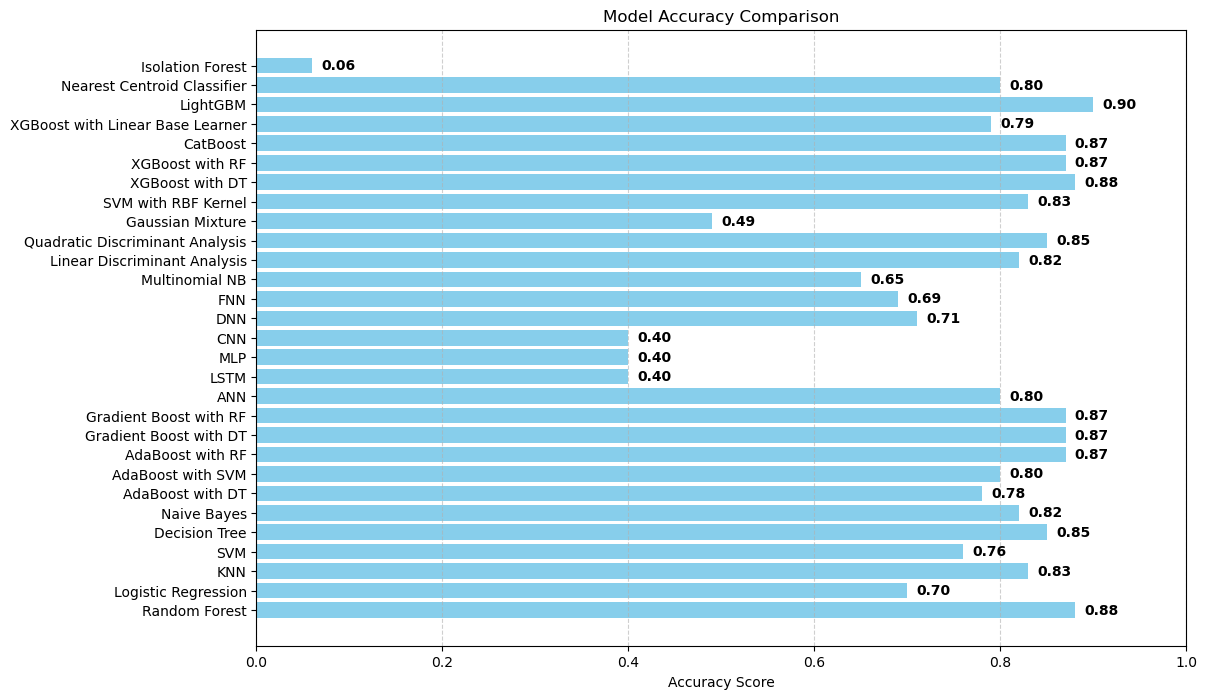

In [54]:
import matplotlib.pyplot as plt


models = ['Random Forest', 'Logistic Regression', 'KNN', 'SVM', 'Decision Tree',
          'Naive Bayes', 'AdaBoost with DT', 'AdaBoost with SVM', 'AdaBoost with RF',
          'Gradient Boost with DT', 'Gradient Boost with RF', 'ANN', 'LSTM', 'MLP', 'CNN',
          'DNN', 'FNN', 'Multinomial NB', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis',
          'Gaussian Mixture', 'SVM with RBF Kernel', 'XGBoost with DT', 'XGBoost with RF',
          'CatBoost', 'XGBoost with Linear Base Learner', 'LightGBM', 'Nearest Centroid Classifier', 'Isolation Forest']


accuracy_scores = [0.88, 0.70, 0.83, 0.76, 0.85, 0.82, 0.78, 0.80, 0.87, 0.87, 0.87, 0.80, 0.40, 0.40, 0.40,
                   0.71, 0.69, 0.65, 0.82, 0.85, 0.49, 0.83, 0.88, 0.87, 0.87, 0.79, 0.90, 0.80, 0.06]


plt.figure(figsize=(12, 8))
plt.barh(models, accuracy_scores, color='skyblue')
plt.xlabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  
plt.grid(axis='x', linestyle='--', alpha=0.6)


for i, v in enumerate(accuracy_scores):
    plt.text(v + 0.01, i, f'{v:.2f}', color='black', va='center', fontweight='bold')

plt.show()
